In [1]:
import pandas as pd
import statistics as stt
from matplotlib import pyplot as plt

Categoria 1 - Formatação de Dados - File to Data (FTD)

In [2]:
# Repara os dados quebrados, separa os dados por espaço e renomeia as ausências de coletas para "Nulo".
def fix_entry(entry):
    fixed_entry0 = entry.replace('P rópria', 'Própria')
    fixed_entry1 = fixed_entry0.replace('/n', ' ')
    fixed_entry = fixed_entry1.replace('Não Realizada', 'Nulo')
    return fixed_entry

# Lista de identificadores dos pontos de coleta.
beach_ids = ['BG000', 'GM000', 'GM001', 'PN000',
             'PS001', 'PS000', 'BD000', 'BD002',
             'BD003', 'BD005', 'BD007', 'BD009',
             'BD010', 'JT000', 'PP010', 'GV001',
             'GV002', 'VD000', 'LB000', 'LB001',
             'LB003', 'IP003', 'IP010', 'IP006',
             'AR000', 'PD000', 'CP100', 'CP004',
             'CP005', 'CP008', 'LM002', 'VR000',
             'UR000', 'BT000', 'BT001', 'FL000', 'FL004']

# Lista de entrada válidas.
valid_entries = ['Própria', 'Imprópria', 'Nulo']

# Indexador de arquivos.
files = ['d_2017_1', 'd_2017_2', 'd_2018_1', 'd_2018_2']
date_files = ['days_2017', 'days_2018', 'days_2019', 'days_2020']

# Cria um dicionário vazio para armazenar as datas.
dates_0 = {}

In [3]:
# Aplica a função fix_entry(), separa os dados utilizando espaços como separadores, coloca-os em uma lista filtrando as entradas válidas.
def clean_data(old_data):
    prep_data = fix_entry(old_data)
    target_list = prep_data.split()
    new_data = []
    for c in target_list:
        if (c in beach_ids) or (c in valid_entries):
            new_data.append(c)
    return new_data

In [4]:
# Cria um dicionário com as praias e atribui cada entrada em ordem cronológica a elas.
def formatter(w_data):
    dict_build = {}
    id_counter = []
    for w_entry in (w_data):
        
        if w_entry in beach_ids:
            
            if w_entry not in id_counter:
                dict_build.update({w_entry : []})
            id_counter.append(w_entry)
        else:
            dict_build[id_counter[-1]].append(w_entry)
            
    return dict_build  

In [6]:
# Testa os dados formatados pela função formatter() e retorna a quantidade de entradas em cada praia.
# Nota: Para que o programa funcione corretamente, é necessário que todas as praias possuam o mesmo número de entradas.
# Nota 2: Todas as entradas são consideradas. Própria, Imprópria ou Nulo.
def data_validation(data):
    counter_list = []
    indexer = 0
    for checking in beach_ids:
        counter_list.append(len(data[checking]))
        
    ev = stt.mode(counter_list)
    print(f'-- The expected value is {ev} --') 
    
    for checking in counter_list:
        if checking != ev:
            print(f'{beach_ids[indexer]} - {checking}')
        indexer += 1
    print('---------------------')
        

In [7]:
# Cria um arquivo .csv (comma separated values) das entradas de cada praia em determinado ano.
def create_csv(dictionary, year):
    df = pd.DataFrame(dictionary)
    df.to_csv(f'raw_data_{year}.csv')

In [8]:
# Recebe um ano, recolhe os dados semestrais e os une, posteriormente aplicando as funções clean_data() e formatter() respectivamente.
# Nota: Esta função retorna os dados finais.
def ftd(year):
    semesters_ref = [f'd_{year}_1', f'd_{year}_2']
    semesters_raw = []
    for reader in semesters_ref:
        temp_file = open(f'{reader}.txt')
        semesters_raw.append(temp_file.read())
        temp_file.close()
    cleaned = clean_data(semesters_raw[0]) + clean_data(semesters_raw[1])
    final_data = formatter(cleaned)
    return final_data

In [9]:
# Executa a função fdt() em determinado ano e armazena o dicionário recebido em uma váriavel.
working_data = ftd(2017)
print(working_data)

{'BG000': ['Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Imprópria', 'Própria', 'Imprópria', 'Imprópria', 'Imprópria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Imprópria', 'Imprópria', 'Imprópria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Imprópria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Imprópria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Imprópria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Imprópria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria', 'Própria',

Categoria 2 - Formatação de Dados - Time Series Strucuture (TSS)

In [12]:
# Acessa os arquivos de datas de coleta, retifica as entradas e as armazena em uma lista
def date_formatter(target):
    for reader in date_files:
        temp_file = open(f'{reader}.txt')
        output_text = temp_file.read()
        target.update({f'{reader.replace("days_", "")}' : output_text.split()})
        temp_file.close()

In [13]:
date_formatter(dates_0)
print(dates_0)

{'2017': ['2', '5', '9', '12', '16', '18', '23', '26', '30', '2', '6', '9', '13', '16', '20', '22', '2', '6', '9', '13', '16', '20', '23', '27', '30', '6', '11', '19', '24', '27', '4', '8', '11', '15', '18', '22', '25', '29', '1', '5', '8', '13', '19', '22', '26', '29', '3', '6', '10', '13', '17', '20', '24', '27', '31', '3', '7', '10', '14', '17', '21', '24', '29', '31', '4', '11', '14', '20', '25', '28', '2', '5', '10', '16', '19', '23', '26', '31', '6', '9', '16', '21', '23', '27', '30', '4', '7', '11', '14', '18', '20', '27'], '2018': ['2', '4', '8', '11', '15', '18', '22', '25', '29', '1', '5', '7', '15', '19', '22', '26', '1', '5', '8', '12', '15', '19', '22', '27', '2', '5', '9', '12', '16', '19', '24', '26', '3', '7', '10', '14', '17', '21', '24', '30', '4', '7', '11', '14', '18', '20', '25', '28', '3', '5', '9', '12', '16', '19', '23', '26', '30', '2', '6', '9', '13', '16', '20', '23', '27', '30', '3', '5', '10', '13', '17', '20', '24', '27', '1', '4', '8', '10', '15', '18', '

In [14]:
# Função de criação de série temporal. Esta função as datas de coleta mensais em uma única lista indicando cada dia de coleta do ano.
def establish_interval(year, time_entries):
    
    # Checa se o ano é bissexto e estrutura os meses.
    isLeap = False
    if (year % 4 == 0 and year % 100 != 0) or year % 400 == 0:
        isLeap = True

    # Dictionary for months
    month_length = {'jan' : 31,
                      'feb' : 29 if isLeap else 28,
                      'mar' : 31,
                      'apr' : 30,
                      'may' : 31,
                      'jun' : 30,
                      'jul' : 31,
                      'aug' : 31,
                      'sep' : 30,
                      'oct' : 31,
                      'nov' : 30,
                      'dec' : 31}
    
    months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    
        
    
    formatted = [int(time_entries[0])]
    actual = 0
    for c in range(1, len(time_entries)):
        working_month = months[actual]
        
        if int(time_entries[c]) < int(time_entries[c - 1]):
            formatted.append(int(formatted[-1]) + int(time_entries[c]) + month_length[working_month] - int(time_entries[c - 1]))
            actual += 1
            
        else:
            formatted.append(int(formatted[-1]) + int(time_entries[c]) - int(time_entries[c - 1]))
    return formatted





In [20]:
print(establish_interval(2017, dates_0['2017']))

[2, 5, 9, 12, 16, 18, 23, 26, 30, 33, 37, 40, 44, 47, 51, 53, 61, 65, 68, 72, 75, 79, 82, 86, 89, 96, 101, 109, 114, 117, 124, 128, 131, 135, 138, 142, 145, 149, 152, 156, 159, 164, 170, 173, 177, 180, 184, 187, 191, 194, 198, 201, 205, 208, 212, 215, 219, 222, 226, 229, 233, 236, 241, 243, 247, 254, 257, 263, 268, 271, 275, 278, 283, 289, 292, 296, 299, 304, 310, 313, 320, 325, 327, 331, 334, 338, 341, 345, 348, 352, 354, 361]


In [26]:
# Funcional, porém incompleta.
def redux(year, input_dict):
    redux_dict = {}
    date_holder = establish_interval(year, dates_0[str(year)])
    counter = 0
    for beach in beach_ids:
        temp_list = []
        for iterating in range(len(input_dict[beach])):
            if input_dict[beach][iterating] == 'Própria':
                temp_list.append(tuple([date_holder[iterating], 1]))
            elif input_dict[beach][iterating] == 'Imprópria':
                temp_list.append(tuple([date_holder[iterating], -1]))
            else:
                temp_list.append(tuple([date_holder[iterating], 0]))
        redux_dict.update({beach: temp_list})
        counter += 1
    return redux_dict

In [31]:
reduced = redux(2017, working_data)
gm000 = reduced['GM000']

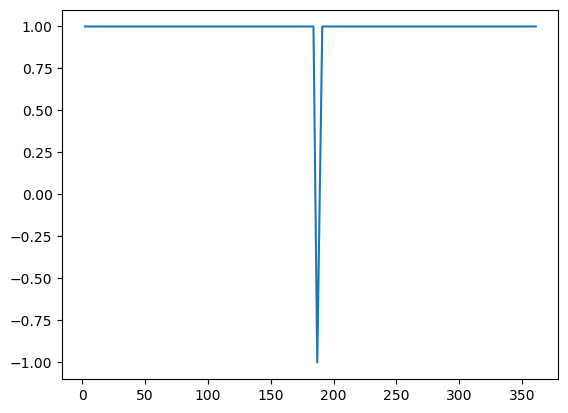

In [39]:
zip(*reduced['VR000'])
plt.plot(*zip(*reduced['VR000']))
plt.show()